### Завантаження файлів

Зчитуємо Lb2_10_1.prn та Lb2_10_2.prn та обчислює математичне сподівання (середнє значення) кожної вибірки за формулою

In [54]:
import numpy as np

data1 = np.loadtxt('Lb2_10_1.prn')
data2 = np.loadtxt('Lb2_10_2.prn')

mean1 = np.mean(data1)
mean2 = np.mean(data2)

print("Математичне сподівання вибірки з Lb2_10_1.prn:", mean1)
print("Математичне сподівання вибірки з Lb2_10_2.prn:", mean2)


Математичне сподівання вибірки з Lb2_10_1.prn: -0.5112578281718282
Математичне сподівання вибірки з Lb2_10_2.prn: 0.04972301598401598


Обчислюємо оцінку кореляційної функції за формулою для кожної вибірки.

In [55]:
import numpy as np

def correlogram(x, max_lag):
    """
    Обчислює оцінку кореляційної функції (корелограму)
    для послідовності x при лагах від 0 до max_lag.
    """
    N = len(x)
    x_mean = np.mean(x)
    
    denominator = np.sum((x - x_mean)**2)
    
    r = []
    for k in range(max_lag + 1):
        numerator = 0.0
        for i in range(N - k):
            numerator += (x[i] - x_mean) * (x[i + k] - x_mean)
        r_k = numerator / denominator
        r.append(r_k)
        
    return np.array(r)

n1 = len(data1)
n2 = len(data2)

max_lag_1 = n1 // 10
max_lag_2 = n2 // 10

r1 = correlogram(data1, max_lag_1)
r2 = correlogram(data2, max_lag_2)


Виведемо результати

In [56]:
print("Корелограма для Lb2_10_1.prn (r1):", r1)
print("Корелограма для Lb2_10_2.prn (r2):", r2)

Корелограма для Lb2_10_1.prn (r1): [ 1.00000000e+00  5.97741699e-01  3.86152093e-01  2.64279014e-01
  1.59555624e-01  1.28151753e-01  1.12100804e-01  9.36455057e-02
  7.60976817e-02  2.72008786e-02  2.47069964e-02  6.26890827e-03
 -4.12361350e-04 -4.13317252e-02 -7.59374820e-02 -4.77112589e-02
 -5.39255464e-02 -2.92251095e-02  9.26088011e-03  5.51895114e-02
  5.18014627e-02  3.69125147e-02  5.36806771e-02  3.60679333e-02
  5.20474662e-02  4.27616760e-02  2.96060825e-02  2.92935034e-03
  6.04073036e-03  2.04321375e-02  2.76046597e-02  4.62439812e-03
  1.16537343e-02 -1.27159069e-02  6.62902088e-03 -4.72614820e-03
 -4.42693511e-03 -6.42842515e-03 -1.34671014e-02 -1.03417224e-02
  3.84187065e-02  5.99451496e-02  2.95349741e-02  8.52423312e-03
 -1.57683790e-02 -7.52726229e-03  5.47500942e-03  5.10070647e-03
  1.69727001e-02  3.20476578e-02  3.61631427e-02  2.89810530e-02
  2.54742039e-02  1.89700400e-02  4.27341493e-03  3.00519729e-02
  4.25919020e-02  4.24884549e-02  6.92822899e-02  5.974

Побудова графіків корелограм

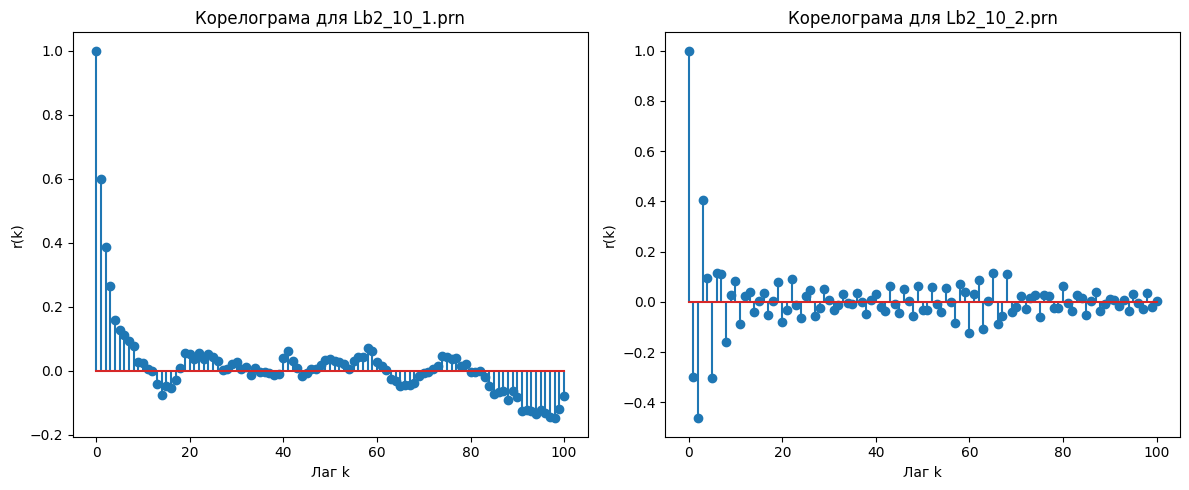

In [57]:
import matplotlib.pyplot as plt

lags1 = np.arange(max_lag_1 + 1)
lags2 = np.arange(max_lag_2 + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(lags1, r1)
plt.title("Корелограма для Lb2_10_1.prn")
plt.xlabel("Лаг k")
plt.ylabel("r(k)")

plt.subplot(1, 2, 2)
plt.stem(lags2, r2)
plt.title("Корелограма для Lb2_10_2.prn")
plt.xlabel("Лаг k")
plt.ylabel("r(k)")

plt.tight_layout()
plt.show()


### Висновок

**Перша вибірка (Lb2_10_1.prn)**

Загальний вигляд корелограми:

Спочатку (на малих лагах) кореляція є позитивною і порівняно швидко зменшується, проте далі (на середніх та великих лагах) автокореляційна функція демонструє істотні відхилення від нуля. Зокрема, на великих лагах (70–100) набуває помітних від’ємних значень −0.06,−0.08,−0.12,−0.15 тощо.

Наявність значущої (не нульової) кореляції на середніх та великих лагах свідчить про те, що послідовність не є «близькою до білого шуму» й має певну довготривалу пам’ять або тренд/циклічність.

Таким чином, перша вибірка, ймовірно, має виражену кореляційну структуру і не є простим «випадковим шумом» із швидким згасанням автокореляції.

**Друга вибірка (Lb2_10_2.prn)**

Загальний вигляд корелограми:

Спочатку (на малих лагах)  коливається з помітною амплітудою, проте далі вже починаючи з лагів 10–20 значення автокореляції переважно невеликі та різноспрямовані (зміна знака з «+» на «-» і навпаки), а на великих лагах вони коливаються біля нуля.

Швидке згасання автокореляції та коливання навколо нуля на віддалених лагах свідчить про те, що довготривалої пам’яті у цієї послідовності немає або вона дуже слабо виражена..

Отже, друга вибірка набагато ближча до «короткозалежного» процесу. Можна припустити, що вона є стаціонарною (у вузькому розумінні) або хоча б «квазистаціонарною» з короткою пам’яттю.

In [58]:
def bartlett_window(k, m):
    """
    Кореляційне вікно Бартлетта для 0 <= k <= m.
    """
    return max(0.0, 1.0 - k/(m+1))

In [59]:
def tukey_window(k, m, alpha=0.5):
    """
    Кореляційне вікно Тюкі для k=0..m з параметром alpha (0..1).
    """
    if k > m:
        return 0.0
    k0 = (1.0 - alpha) * m
    
    if k <= k0:
        return 1.0
    else:
        return 0.5 * (1 + np.cos(np.pi * (k - k0) / (alpha*m)))

In [60]:
def correlogram_acf(x, max_lag):
    N = len(x)
    x_mean = np.mean(x)
    denominator = np.sum((x - x_mean)**2)
    
    r = np.zeros(max_lag + 1)
    for k in range(max_lag + 1):
        numerator = 0.0
        for i in range(N - k):
            numerator += (x[i] - x_mean)*(x[i + k] - x_mean)
        r[k] = numerator / denominator
        
    return r


In [61]:
def spectral_estimate(r, window_func, m, num_points=256, alpha=None):

    freq = np.linspace(0, np.pi, num_points)
    Sx = np.zeros(num_points)
    
    for i, w_val in enumerate(freq):
        omega = w_val
        if alpha is not None:
            w0 = window_func(0, m, alpha)
        else:
            w0 = window_func(0, m)
        
        sum_val = w0 * r[0]

        for k in range(1, m+1):
            if alpha is not None:
                wk = window_func(k, m, alpha)
            else:
                wk = window_func(k, m)
            sum_val += 2.0 * wk * r[k] * np.cos(omega * k)
        
        Sx[i] = sum_val
    
    return freq, Sx

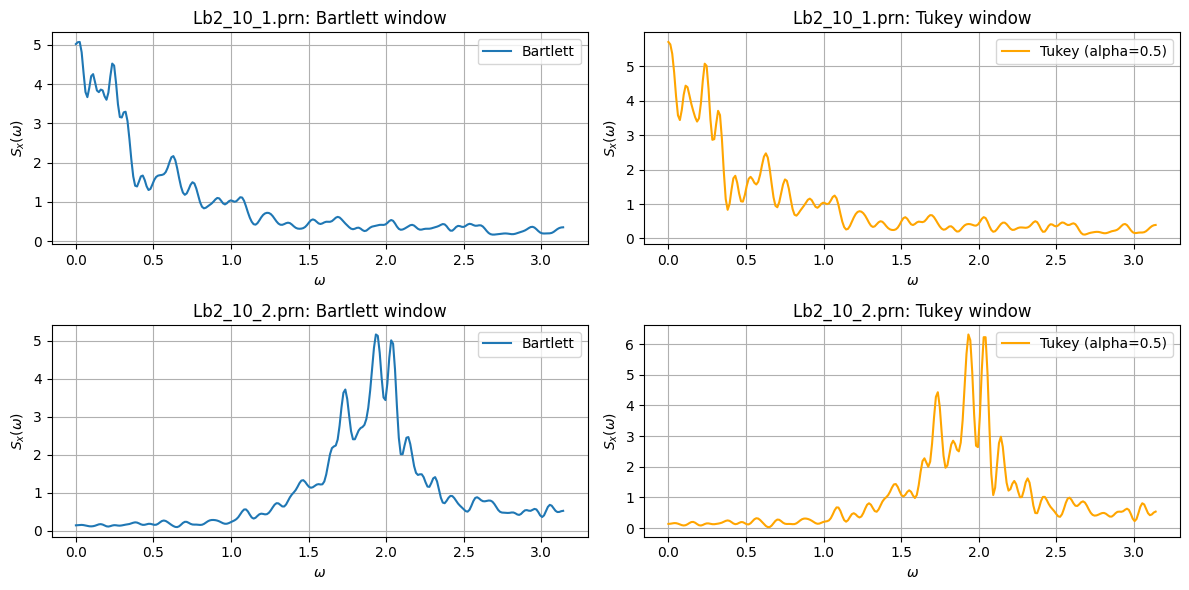

In [62]:
import numpy as np
import matplotlib.pyplot as plt

n1 = len(data1)
n2 = len(data2)
m1 = n1 // 10
m2 = n2 // 10

r1 = correlogram_acf(data1, m1)
r2 = correlogram_acf(data2, m2)

freq1_b, Sx1_bart = spectral_estimate(r1, bartlett_window, m1)
freq2_b, Sx2_bart = spectral_estimate(r2, bartlett_window, m2)

alpha = 0.5
freq1_t, Sx1_tukey = spectral_estimate(r1, tukey_window, m1, alpha=alpha)
freq2_t, Sx2_tukey = spectral_estimate(r2, tukey_window, m2, alpha=alpha)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(freq1_b, Sx1_bart, label="Bartlett")
plt.title("Lb2_10_1.prn: Bartlett window")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_x(\omega)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(freq1_t, Sx1_tukey, label=f"Tukey (alpha={alpha})", color='orange')
plt.title("Lb2_10_1.prn: Tukey window")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_x(\omega)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freq2_b, Sx2_bart, label="Bartlett")
plt.title("Lb2_10_2.prn: Bartlett window")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_x(\omega)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freq2_t, Sx2_tukey, label=f"Tukey (alpha={alpha})", color='orange')
plt.title("Lb2_10_2.prn: Tukey window")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_x(\omega)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Висновок


На основі наведених спектральних оцінок (корелограмний метод із вікнами Бартлетта та Тюкі) можна зробити такі загальні висновки:

Lb2_10_1.prn

Спектр сконцентрований переважно на низьких і середніх частотах, без різко виражених піків.
Є помітний плавний спад спектра з ростом частоти.
Така форма спектра вказує на відсутність яскраво вираженої періодичності та може свідчити про наявність або повільних змін (низькочастотні компоненти), або більш «широкого» шумоподібного характеру процесу.

Lb2_10_2.prn

У спектрі чітко виділяються один або кілька виражених піків на середніх частотах (близько ω≈1.6…2.3).
Наявність цих піків вказує на помітну періодичну (або квазісинусоїдальну) складову у процесі.
Решта спектра порівняно «нижча», що підтверджує переважання окремих частотних складових над широкосмуговим шумом.

Порівняння вікон Бартлетта та Тюкі

Загальна форма спектрів збігається, проте вікно Тюкі (при α=0.5) дає трохи згладженіший результат і меншу «зубчастість» у порівнянні з Бартлеттом.
Піки при використанні Тюкі часто виглядають більш «округлими», а бічні пелюстки – приглушеними.


### Параметричний  метод   із    використанням    моделі авторегресії другого порядку

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Функція для обчислення автоковаріації r(k) на лагах k=0,1,2
def estimate_autocovariances(x, max_lag=2):
    """
    Повертає список [r(0), r(1), r(2)] для вибірки x,
    де r(k) = (1/N) * sum_{t=1}^{N-k} (x[t]-mean)*(x[t+k]-mean).
    """
    N = len(x)
    x_mean = np.mean(x)
    r = []
    for k in range(max_lag + 1):
        sum_val = 0.0
        for t in range(N - k):
            sum_val += (x[t] - x_mean)*(x[t + k] - x_mean)
        r_k = sum_val / N 
        r.append(r_k)
    return r

# 2. Функція для оцінки параметрів AR(2) за рівняннями Юла–Уокера
def estimate_ar2_params(r):
    """
    r - список [r(0), r(1), r(2)].
    Повертає (a1, a2, sigma_w2).
    """
    r0, r1, r2 = r[0], r[1], r[2]
    
    
    denom = (r0**2 - r1**2)
    if abs(denom) < 1e-12:
        raise ValueError("Неможливо оцінити AR(2): r0^2 ~ r1^2 (виродження).")
    
    a1 = (r1*r0 - r2*r1) / denom
    a2 = (r2 - a1*r1) / r0
    sigma_w2 = r0 - a1*r1 - a2*r2
    
    return a1, a2, sigma_w2

# 3. Функція для побудови оцінки спектра за AR(2)-моделлю
def ar2_spectrum(a1, a2, sigma_w2, num_points=256):
    """
    Обчислює S_A(omega) на сітці [0, pi].
    Повертає (omega, S).
    """
    omega = np.linspace(0, np.pi, num_points)
    S = np.zeros(num_points)
    for i, w in enumerate(omega):
        z = 1 - a1*np.exp(-1j*w) - a2*np.exp(-1j*2*w)
        denom = np.abs(z)**2
        S[i] = sigma_w2 / denom
    return omega, S

### Обчислення

In [64]:
# 1. Оцінюємо r(0), r(1), r(2) для кожної вибірки
r_data1 = estimate_autocovariances(data1, max_lag=2)  # [r0, r1, r2]
r_data2 = estimate_autocovariances(data2, max_lag=2)

# 2. Обчислюємо параметри AR(2) (a1, a2, sigma_w2)
a1_1, a2_1, sigma_w2_1 = estimate_ar2_params(r_data1)
a1_2, a2_2, sigma_w2_2 = estimate_ar2_params(r_data2)

print("=== Параметри AR(2) для Lb2_10_1.prn ===")
print(f"a1 = {a1_1:.4f}, a2 = {a2_1:.4f}, sigma_w^2 = {sigma_w2_1:.4f}\n")

print("=== Параметри AR(2) для Lb2_10_2.prn ===")
print(f"a1 = {a1_2:.4f}, a2 = {a2_2:.4f}, sigma_w^2 = {sigma_w2_2:.4f}\n")

# 3. Будуємо спектральні оцінки
omega1, S1 = ar2_spectrum(a1_1, a2_1, sigma_w2_1, num_points=512)
omega2, S2 = ar2_spectrum(a1_2, a2_2, sigma_w2_2, num_points=512)

=== Параметри AR(2) для Lb2_10_1.prn ===
a1 = 0.5709, a2 = 0.0449, sigma_w^2 = 8.2213

=== Параметри AR(2) для Lb2_10_2.prn ===
a1 = -0.4764, a2 = -0.6046, sigma_w^2 = 8.4183



### Відображаємо результати

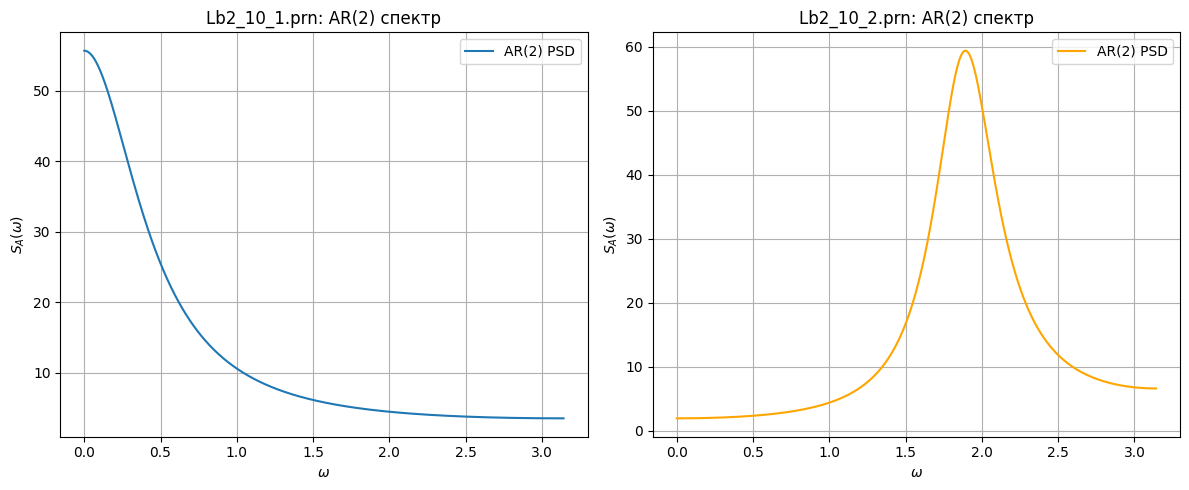

In [65]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(omega1, S1, label="AR(2) PSD")
plt.title("Lb2_10_1.prn: AR(2) спектр")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_A(\omega)$')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(omega2, S2, color='orange', label="AR(2) PSD")
plt.title("Lb2_10_2.prn: AR(2) спектр")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_A(\omega)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Порівняння з непараметричними методами

Якщо раніше за корелограмним методом чи періодограмою для Lb2_10_2.prn було видно чіткі піки, то AR(2)-оцінка підтверджує їх існування, але описує їх однією «резонансною» частотою.
Для Lb2_10_1.prn AR(2)-оцінка дає «монотонно спадний» спектр, що добре узгоджується з відсутністю різких піків у непараметричних оцінках.

Загальний висновок

Lb2_10_1.prn можна вважати процесом із м’якою кореляційною структурою, без суттєвих осциляцій (швидше «AR(1)-подібний»).
Lb2_10_2.prn має коливальний характер, який проявляється у спектрі у вигляді резонансного піка на середніх частотах.
Отримані результати підтверджують різницю в поведінці двох вибірок: перша «більш гладка/низькочастотна», друга – «коливальна/резонансна».